
# Project: Investigate a Dataset (No-show appointments)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

The selected dataset has information about 100k medical appointments in Brazil that shows whether a patient showed up to his/her appointment as well as multiple other factors that may affect their showing up. Namely, it provides with each record the following info: PatientId, AppointmentID, Gender, ScheduledDay, AppointmentDay, Age, Neighbourhood, Scholarship, Hipertension, Diabetes, Alcoholism, Handcap, SMS_received, No-show.

In this report, investigation will examine the sample data from 110527 of patients to answer two research questions of whether were any characteristics made patients more likely to show up for their appointments.

In [1]:
# importing necessary libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

In this section data will be loaded and preprocessing will be conducted to make the data ready for analysis.

### General Properties

In [2]:
# Loading data
appointment = pd.read_csv('KaggleV2-May-2016.csv')
appointment.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
appointment.shape

(110527, 14)

The dataset has 110527 rows and 14 columns 

In [4]:
appointment.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


Above table shows descriptive statistics about each column: 

* Average age for patients is 37 years old with min -1 (meaning we have some invalid age data) and a max of 115 years old, where most of the patients are between 18 and 55 years old.
* 9% of patients have scholership.
* 20% of patients have hypertension.
* 7% of patients have diabetes.
* 3% of patients have alcoholism.
* 2% of patients are handicapped.
* 32% of patients have received SMS about their appointments.

In [5]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
appointment.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [6]:
appointment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


from the info, we found no missing values.

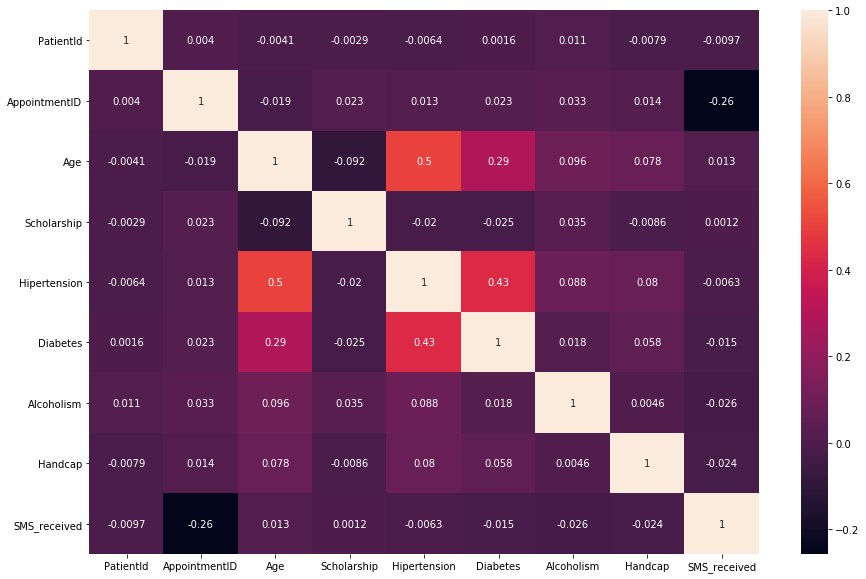

In [7]:
# checking for the correlation between any variables 
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(appointment.corr(), ax=ax, annot=True);

### Data Cleaning 

The data cleaning section consists of 

* Dropping of uncessary colums 
* Renaming the column for feasibilty 
* NoShow column has dummified so that we can have the plot of it for getting the ratio

In [8]:
#renaming the column name
appointment.columns = ['PatientID', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hypertension',
       'Diabetes', 'Alcoholism', 'Handicap', 'SMS', 'NoShow']

#dropping the unnecessary columns 
appointment.drop(['PatientID', 'AppointmentID'], axis=1, inplace=True)
appointment.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS,NoShow
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [9]:
# checking for the negative age which is the reason for getting the mean of Age of -1 in the data description
appointment[appointment.Age > 0].shape
appointment[appointment.Age == 0].shape
appointment[appointment.Age < 0].shape

(1, 12)

In [10]:
# replacing the negative Age value with the mean 
appointment.loc[appointment['Age'] <= 0, 'Age'] = appointment['Age'].mean()
appointment.describe()

,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS
count,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,38.276780,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,22.104561,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.088874,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [11]:
appointment.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS,NoShow
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62.0,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56.0,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62.0,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8.0,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56.0,JARDIM DA PENHA,0,1,1,0,0,0,No


In [12]:
#dummifying the column 'NoShow'
appointment['NoShow'] = appointment['NoShow'].apply(lambda x: 0 if x=='No' else 1)
appointment.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS,NoShow
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62.0,JARDIM DA PENHA,0,1,0,0,0,0,0
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56.0,JARDIM DA PENHA,0,0,0,0,0,0,0
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62.0,MATA DA PRAIA,0,0,0,0,0,0,0
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8.0,PONTAL DE CAMBURI,0,0,0,0,0,0,0
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56.0,JARDIM DA PENHA,0,1,1,0,0,0,0


<a id='eda'></a>
## Exploratory Data Analysis


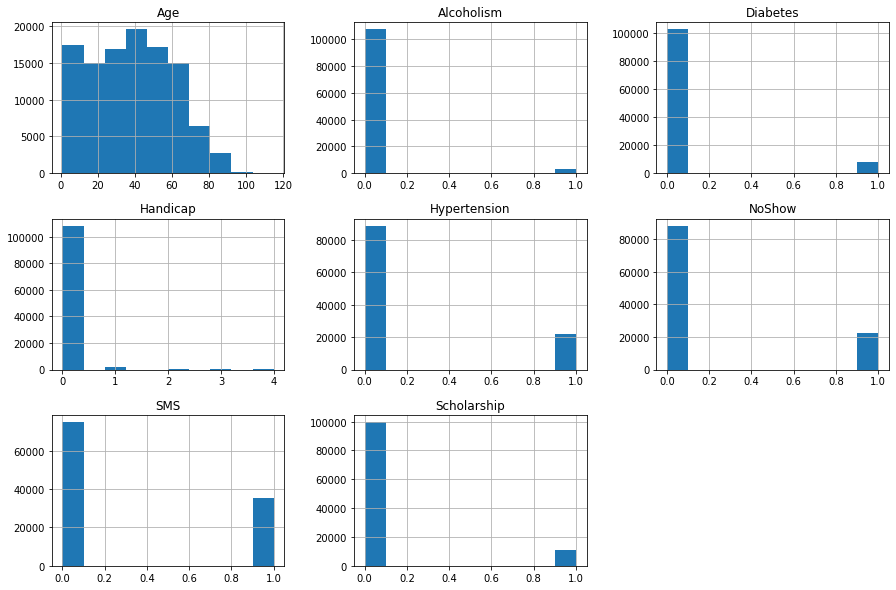

In [13]:
#checking the statistical orientation 
appointment.hist(figsize=(15, 10));

The histograms above reveals some insights:
* Most of patients are in age between 0 to 63 (approx).
* Majority of people has got the appointment (will dig into this later).
* There could be a correlation in between SMS_received and getting appointment.

### Research Question 1. Do older patients are likely to get appointment than younger people?

In [14]:
# representing the show and no show with 0 and 1
show = appointment['NoShow'] == 0
no_show = appointment['NoShow'] == 1

In [15]:
appointment[show].mean()

Age             39.009861
Scholarship      0.093903
Hypertension     0.204392
Diabetes         0.073837
Alcoholism       0.030417
Handicap         0.022742
SMS              0.291334
NoShow           0.000000
dtype: float64

In [16]:
appointment[no_show].mean()

Age             35.379533
Scholarship      0.115507
Hypertension     0.169004
Diabetes         0.064071
Alcoholism       0.030333
Handicap         0.020297
SMS              0.438371
NoShow           1.000000
dtype: float64

The above mean values of show and no-show represents:

* Mean age of the patients who showed up tend to be little more than the age of the patients who didn't
* Scholership, hypertension, diabetes, alcoholism and being handicapped seem not to or have a very small effect on patients showing up

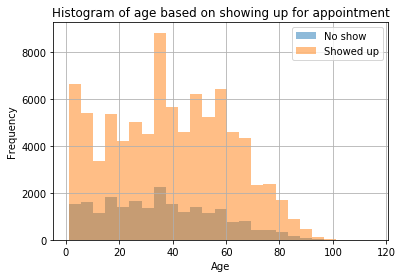

In [17]:
# visualization of showing up and not showing up on basis of Age 
appointment.Age[no_show].hist(label='No show', alpha=0.5, bins=25)
appointment.Age[show].hist(label='Showed up', alpha=0.5, bins=25)
plt.ylabel('Frequency')
plt.xlabel('Age')
plt.title('Histogram of age based on showing up for appointment')
plt.legend();

From the Histogram: 
* It's almost visible that most of the people of every age group has got the appoitmnet. But Patients who didn't show up for the appointment are seem to be younger.
* No-show rate at the older age is less.

Next, we will try to find out the Age group basis show up rate, which will help us to answer the research question. 

In [18]:
# Define a new column to include the Age Groups
AgeGroupLabels = [ "{0} - {1}".format(i, i + 19) for i in range(0, 120, 20)]
appointment['AgeGroup'] = pd.cut(appointment.Age, range(0, 121, 20), right=False, labels=AgeGroupLabels)
appointment['AgeGroup'] = appointment.AgeGroup.astype('category')
ax= appointment.AgeGroup.cat.categories

In [19]:
# defining function 
def groupby_barchart(grby, fctr):
    appointment.groupby(grby)[fctr].mean().plot(kind='bar', grid=True);

In [20]:
# defining function 
def Show_No_Show_bar_plot(appointment, bygroup):
    appointment_by_Group = pd.crosstab(appointment[bygroup], appointment.NoShow, normalize = 'index')
    appointment_by_Group = np.round((appointment_by_Group * 100), decimals=2)
    ax = appointment_by_Group.plot.bar(figsize=(15,10));
    vals = ax.get_yticks()
    ax.set_yticklabels(['{:3.0f}%'.format(x) for x in vals]);
    ax.set_xticklabels(appointment_by_Group.index,rotation = 0, fontsize = 15);
    ax.set_title('\nShowUp vs. No ShowUp (%) (by ' + appointment_by_Group.index.name + ')\n', fontsize = 15)
    ax.set_xlabel(appointment_by_Group.index.name, fontsize = 12)
    ax.set_ylabel('(%)', fontsize = 12)
    ax.legend(loc = 'upper left',bbox_to_anchor=(1.0,1.0), fontsize= 12)
    rects = ax.patches

    # Add Data Labels

    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2, 
                height + 2, 
                str(height)+'%', 
                ha='center', 
                va='bottom',
                fontsize = 12)
    return appointment_by_Group

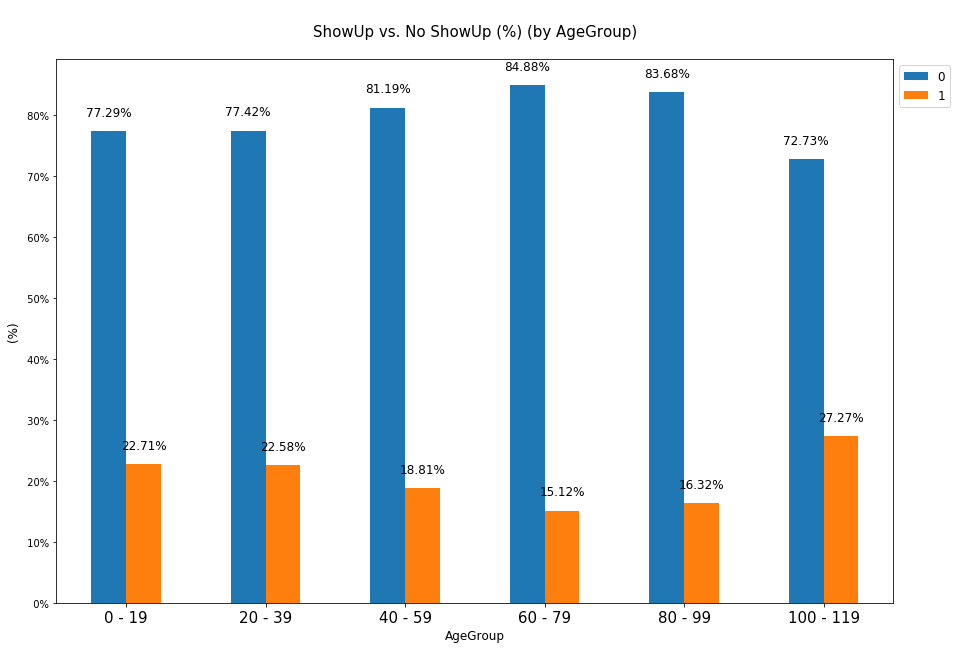

In [21]:
appointment_Gen = Show_No_Show_bar_plot(appointment, 'AgeGroup')

* Based on the analysis, we found:

The proportion of appointments where patients are from the age group (0 -19) is largest among the other age groups, where the age group (100 - 119) is the smallest with 0.01%
Same applies to the number of patients.
The Show-up rate of age group (60 - 79) (per no. of appointments) is the highest with 84.88% where the show-up rate of age group (100 - 119) is the lowest with 72.73%

Moreover, the age ranging from 40 to 99 year has shown most show up rate. We can say middle aged people has a highest show up rate.

### Research Question 2  (Does appointment date delay has any impact on getting appointment ?)

In [22]:
# calculating the difference between scheduled day and appointment day 
appointment['ScheduledDay'] = pd.to_datetime(appointment['ScheduledDay'])
appointment['AppointmentDay'] = pd.to_datetime(appointment['AppointmentDay'])
appointment['delay'] = (appointment['AppointmentDay'].dt.date - appointment['ScheduledDay'].dt.date)

appointment['delay'] = appointment['delay'].apply(lambda date: date.days)
appointment.head(10)

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS,NoShow,AgeGroup,delay
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62.0,JARDIM DA PENHA,0,1,0,0,0,0,0,60 - 79,0
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56.0,JARDIM DA PENHA,0,0,0,0,0,0,0,40 - 59,0
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62.0,MATA DA PRAIA,0,0,0,0,0,0,0,60 - 79,0
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8.0,PONTAL DE CAMBURI,0,0,0,0,0,0,0,0 - 19,0
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56.0,JARDIM DA PENHA,0,1,1,0,0,0,0,40 - 59,0
5,F,2016-04-27 08:36:51+00:00,2016-04-29 00:00:00+00:00,76.0,REPÚBLICA,0,1,0,0,0,0,0,60 - 79,2
6,F,2016-04-27 15:05:12+00:00,2016-04-29 00:00:00+00:00,23.0,GOIABEIRAS,0,0,0,0,0,0,1,20 - 39,2
7,F,2016-04-27 15:39:58+00:00,2016-04-29 00:00:00+00:00,39.0,GOIABEIRAS,0,0,0,0,0,0,1,20 - 39,2
8,F,2016-04-29 08:02:16+00:00,2016-04-29 00:00:00+00:00,21.0,ANDORINHAS,0,0,0,0,0,0,0,20 - 39,0
9,F,2016-04-27 12:48:25+00:00,2016-04-29 00:00:00+00:00,19.0,CONQUISTA,0,0,0,0,0,0,0,0 - 19,2


(15.83148886598862, 8.754659441320515)

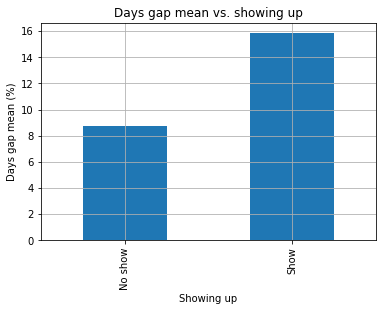

In [23]:
groupby_barchart('NoShow', 'delay')
plt.ylabel('Days gap mean (%)')
plt.xlabel('Showing up')
plt.title('Days gap mean vs. showing up')
ax = plt.gca()
ax.set_xticks([0,1])
ax.set_xticklabels(['No show', 'Show'])

(appointment[no_show].delay.mean(), appointment[show].delay.mean())

* From the above bar chart 
The more the difference between the scheduled and appointment date the higher the chance of being shown up for the appointment., in particular, patients that showed up for their appointments have a gap of days with a mean of 15.8% whereas patients that didn't have a gap of days with a mean of 8.8%

### Correlation with other variables 

Gender
F    0.203146
M    0.199679
Name: NoShow, dtype: float64

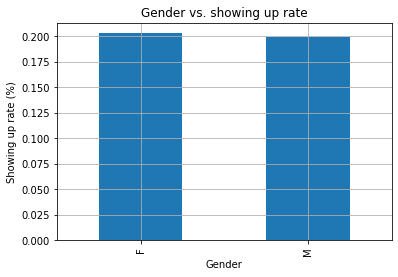

In [24]:
# Checking for relationship of getting appointment with the Gender (any Gender discrimination)

male = appointment[appointment['Gender'] == 'M']
female = appointment[appointment['Gender'] == 'F']

groupby_barchart('Gender', 'NoShow')
plt.ylabel('Showing up rate (%)')
plt.xlabel('Gender')
plt.title('Gender vs. showing up rate')
appointment.groupby('Gender')['NoShow'].mean()

* According to the above bar chart, we can conclude that gender doesn't affect patients showing up!!!

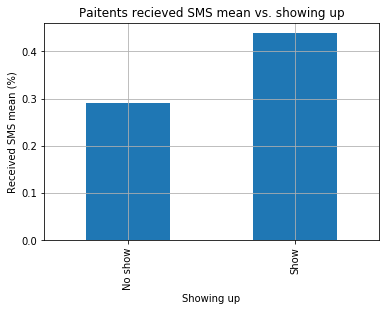

In [25]:
# Are people likely to get appointment, when they receive a SMS??? 

groupby_barchart('NoShow', 'SMS')
plt.ylabel('Received SMS mean (%)')
plt.xlabel('Showing up')
plt.title('Paitents recieved SMS mean vs. showing up')
ax = plt.gca()
ax.set_xticks([0,1])
ax.set_xticklabels(['No show', 'Show']);

In [26]:
(appointment[no_show].SMS.mean(), appointment[show].SMS.mean())

(0.43837089475334917, 0.2913341193542536)

* The above bar chart shows that 29% of patients that showed up for their appointments have received SMS and 44% of patients that didn't show up for their appointments have also received SMS, meaning received SMS doesn't contribute positivly in making patients show up for appointments.

<a id='conclusions'></a>
## Conclusions

After the analysis, the answer of 2 research question we found;

* The age of patients (specifically, younger patients are more likely not to show up compared to older patients). Although after normalizing the data the answer can be given more vividly. Although we found the highest rate of showing up in middle-aged people.
* The gap between the scheduled day and the appointment day affect patients showing up for their appointments.